In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5



In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

<PIL.Image.Image image mode=RGB size=224x224 at 0x1C5512CEC48>


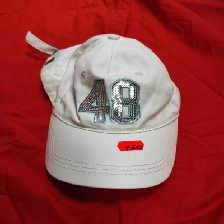

In [7]:
path = r'C:\Users\User\.deeplearning4j\data\clothes\hat\00d94e21-5891-492e-be0e-792e7338c077.jpg'
load_img(path)
img = load_img(path, target_size=(224, 224))
print(img)
img

In [11]:
x = np.array(img)
X = np.array([x])

In [14]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)
decode_predictions(pred)

[[('n15075141', 'toilet_tissue', 0.13617854),
  ('n03788365', 'mosquito_net', 0.11575843),
  ('n03887697', 'paper_towel', 0.01969214),
  ('n04447861', 'toilet_seat', 0.019372877),
  ('n04209239', 'shower_curtain', 0.015099515)]]

In [8]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_ds = train_gen.flow_from_directory(
    r'C:\Users\User\.deeplearning4j\data\clothes', 
    target_size=(224, 224), 
    batch_size=32
)

Found 881 images belonging to 3 classes.


In [6]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    r'C:\Users\User\@Code-ML\daily-coding\ML-Zoomcamp\Week8-Deep Learning\clothing-dataset-small\delete-later-val',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 92 images belonging to 3 classes.


In [29]:
def make_model(learning_rate = 0.00005) :
    base_model= VGG16(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
    outputs = keras.layers.Dense(3)(inner) 
    model = keras.Model(inputs, outputs)
    ##################################################
    
    learning_rate = learning_rate
    optimizer = keras.optimizers.Adam(learning_rate= learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    )
    return model 
    


In [30]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'vgg16-base_model.h5',
    save_best_only=True,
    monitor = 'val_accuracy',
    mode = 'max', 
)

In [31]:
model = make_model()
history = model.fit(train_ds, epochs=10, validation_data = val_ds, callbacks = [checkpoint] )

Epoch 1/10
28/28 [==============================] - 29s 754ms/step - loss: 1.0735 - accuracy: 0.5131 - val_loss: 0.9968 - val_accuracy: 0.5326
Epoch 2/10
28/28 [==============================] - 7s 265ms/step - loss: 0.9541 - accuracy: 0.5312 - val_loss: 0.9179 - val_accuracy: 0.5326
Epoch 3/10
28/28 [==============================] - 8s 274ms/step - loss: 0.8886 - accuracy: 0.5323 - val_loss: 0.8680 - val_accuracy: 0.5326
Epoch 4/10
28/28 [==============================] - 8s 289ms/step - loss: 0.8407 - accuracy: 0.5369 - val_loss: 0.8281 - val_accuracy: 0.5435
Epoch 5/10
28/28 [==============================] - 8s 290ms/step - loss: 0.7995 - accuracy: 0.5880 - val_loss: 0.7890 - val_accuracy: 0.5978
Epoch 6/10
28/28 [==============================] - 8s 277ms/step - loss: 0.7590 - accuracy: 0.6220 - val_loss: 0.7531 - val_accuracy: 0.6522
Epoch 7/10
28/28 [==============================] - 8s 277ms/step - loss: 0.7245 - accuracy: 0.6765 - val_loss: 0.7205 - val_accuracy: 0.7391
Epoch

In [4]:
model = keras.models.load_model('vgg16-base_model.h5')

In [9]:
Y_pred = model.predict_generator(val_ds, 92 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_ds.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(val_ds.classes, y_pred, target_names=list(train_ds.class_indices.keys())))

C:\Users\User\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 5  6  3]
 [ 0 48  1]
 [ 0  7 22]]
Classification Report
              precision    recall  f1-score   support

         hat       1.00      0.36      0.53        14
       pants       0.79      0.98      0.87        49
       shirt       0.85      0.76      0.80        29

    accuracy                           0.82        92
   macro avg       0.88      0.70      0.73        92
weighted avg       0.84      0.82      0.80        92

